In [22]:
import torch
from torch import nn # nn contains bsic building blocks of a computational graph or neural network
import matplotlib.pyplot as plt
import numpy as np

#Check pytorch version
torch.__version__,torch.cuda.is_available()

#make the code device agnostic

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    !nvidia-smi

NVIDIA GeForce GTX 1660 Ti
Wed Nov  8 06:51:40 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.05              Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti     On  | 00000000:01:00.0  On |                  N/A |
| N/A   39C    P8               3W /  80W |     89MiB /  6144MiB |     16%      Default |
|                                         |                      |                  N/A |
+----------------------------------------

## Data (Preparing and Loading data tutorial)

Data can be almost anything in machine learning.


Machine learning is a game of two parts
1. Changing the data into a form that the computer can understand i.e. numerical data
2. Creating a model that can learn from the data

Here we will learn to conver our data to numerical representation

To showcase this, lets create some known data using linear regression equation

In [2]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create data

start = 0
end = 1
step = .02
X = torch.arange(start,end,step).unsqueeze(1)
y = weight*X+bias+torch.rand(X.size())*0.1

print(X[:10])
print(y[:10])


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3031],
        [0.3304],
        [0.3659],
        [0.4237],
        [0.4368],
        [0.4621],
        [0.4735],
        [0.4530],
        [0.4569],
        [0.4802]])


In [3]:

len(X), len(y)

(50, 50)

## Splitting data into training adn test sets (one of the most impoertant concepts)

Lets first split our data to create a training and test set with our data

In [4]:
train_split = int(.8*len(X))
X_train = X[:train_split]   # 80% of the data # :train_split means from 0 to train_split
y_train = y[:train_split]   # 80% of the data

X_test = X[train_split:]    # 20% of the data # train_split: means from train_split to the end
y_test = y[train_split:]    # 20% of the data

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))


40 40
10 10


In [5]:
def plot_prediction(
    X_train,y_train,
    X_test,y_test,
    X_pred=None,y_pred=None
):
    plt.plot(X_train.numpy(),y_train.numpy(),'ro')
    plt.plot(X_test.numpy(),y_test.numpy(),'bo')
    if X_pred is not None and y_pred is not None:
        plt.plot(X_pred.numpy(),y_pred.numpy(),'go')
    plt.legend(['Train','Test','Prediction'])
    plt.show()

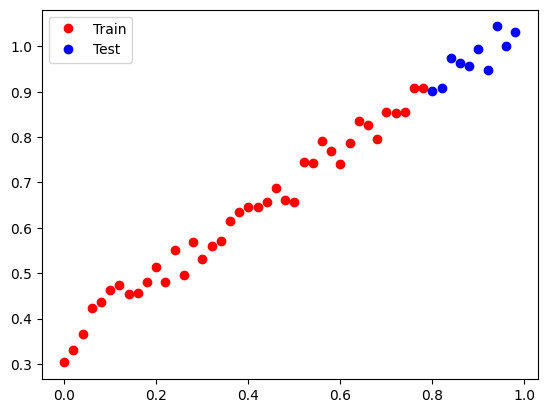

In [6]:
plot_prediction(X_train,y_train,X_test,y_test)

In [7]:
## Create a model

class LinearRegression(nn.Module): # nn.Module is the base class for all neural network modules
    """
    This class implements a linear regression model
    """
    def __init__(self): # Contructor method of the class
        super().__init__()
        self.weight = nn.Parameter(
            torch.randn(
                1,
                requires_grad=True, # This parameter will be trained
                dtype=torch.float32
                )
            )
        self.bias = nn.Parameter(
            torch.randn(
                1,
                requires_grad=True, # This parameter will be trained
                dtype=torch.float32
                )
            )
        # Parameter is a Tensor that's automatically
        #registered as a parameter when assigned as an attribute to a Module.

    def forward(self, x : torch.Tensor) -> torch.Tensor:
        # Forward pass of the model
        # This method is called when the model is called
        return self.weight*x+self.bias # y = wx+b

In [8]:
# Create a random seed for reproducibility

torch.manual_seed(42)

# Create an instance of the model

model_0 = LinearRegression()

In [9]:
#Check the model parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters

model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.infrence_mode()`

To check the power of our models exisitng predicting capabilities,
lets see how well it predicts `y_test` nased on `X_test`

When we pass data through our model, it's going to run it through `forward()` emthod


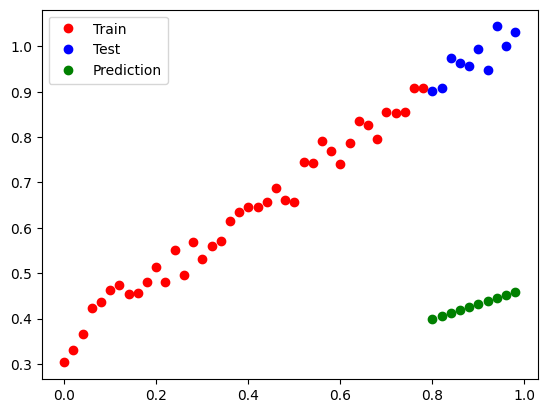

In [11]:
#Make predictions using models

with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred[:10]
plot_prediction(X_train,y_train,X_test,y_test,X_test,y_pred)

We use infrence mode as it stops the tracking of parameters 

### Training the model

The whole idea of tarining is to change the paramters so that their predicitons fit the data

One way of measuring how poor the models prediciton are to use loss fucntion

* Note : Loss functions amy also be reffred to as cost or criterion fucntions.
* Loss funcitons measure the diffrence between ideal output and model predictions. Lower the value better the predictions 

##### Things we need ot train a model
* *#Loss function* : To quantize the prediction error of our model
* *#Optimizer* : Takes intop account the loss of model to optimize the models parameters to improve the loss fucntion

And specifically for pyTorch we need:
* A training loop
* A testing loop

In [12]:
# Setting up a loss function
loss_fn = nn.MSELoss()

# Setting up an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr=.1)

##### Build a training Loop

A couple of things needed in training loop are:
 1. Loop through the data
 2. Forward pass (propagation)
 3. Calculate the loss (compare forward pass predictions to ground truth labels)
 4. Optimizer zero grad
 5. Loss backward - (**BackPropagation**)
 6. Optimizer step- use optimizer function to optimize parameters
 
 loop

Epoch:0 | Loss:0.1425 | Test Loss:0.1958
Epoch:100 | Loss:0.0011 | Test Loss:0.0020
Epoch:200 | Loss:0.0007 | Test Loss:0.0007
Epoch:300 | Loss:0.0007 | Test Loss:0.0006
Epoch:400 | Loss:0.0006 | Test Loss:0.0006


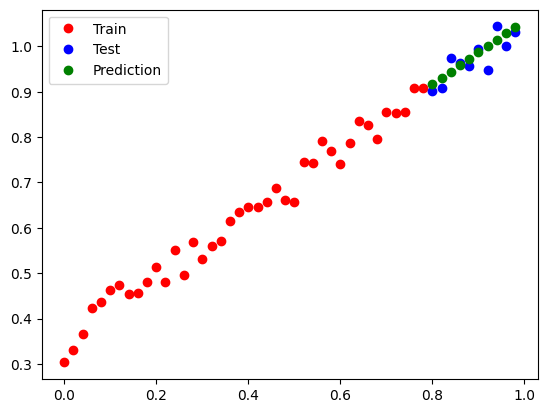

In [13]:
# An epoch is one loop through all of the data... (this is a hyperparameter)
epochs = 500
torch.manual_seed(42)

#Tracking variables

epoch_count = []
loss_values = []
test_loss_values = []

#### Training loop ####

# 0. Loop through data
for epoch in range(epochs):
    # 1. Set the model to training mode
    model_0.train() # Training mode sets all parameters that requires gradient to True
    epoch_count.append(epoch)
    # 2. Forward pass
    y_pred = model_0(X_train)

    # 3. Calculate loss
    loss = loss_fn(y_pred,y_train)
    loss_values.append(loss.item())

    # 4. Optimizer zero grad
    optimizer.zero_grad()   # This is important to do before the backward pass
                            # because PyTorch accumulates the gradients on subsequent backward passes
                            # This is useful for RNNs and CNNs
                            # But for linear regression we don't want to accumulate the gradients

    # 5. Backward pass
    loss.backward()

    # 6. Update parameters
    optimizer.step()

# Test the model

    model_0.eval() # Eval mode sets all parameters that requires gradient to False

    with torch.inference_mode():
        # make predictions
        y_pred = model_0(X_test)

        # calculate loss
        test_loss = loss_fn(y_pred,y_test)
        test_loss_values.append(test_loss.item())

    if(epoch%100==0):
        print(f"Epoch:{epoch} | Loss:{loss.item():.4f} | Test Loss:{test_loss.item():.4f}")

plot_prediction(X_train,y_train,X_test,y_test,X_test,y_pred)


In [14]:
model_0.state_dict(),weight,bias

(OrderedDict([('weight', tensor([0.7053])), ('bias', tensor([0.3519]))]),
 0.7,
 0.3)

In [15]:
# Print the model parameters, loss and accuracy in a tabular form

print(f'Weight: {model_0.weight.item():.4f}, Bias: {model_0.bias.item():.4f}')
print(f'Loss: {loss.item():.4f}')

Weight: 0.7053, Bias: 0.3519
Loss: 0.0006


In [16]:
epoch_count[990:],loss_values[490:],test_loss_values[490:]

([],
 [0.000642446510028094,
  0.0006424398743547499,
  0.0006424334715120494,
  0.000642427068669349,
  0.0006424206658266485,
  0.0006424147868528962,
  0.0006424086168408394,
  0.0006424026796594262,
  0.0006423970335163176,
  0.0006423915037885308],
 [0.0006349737523123622,
  0.000635145406704396,
  0.0006353164790198207,
  0.0006354848155751824,
  0.0006356527446769178,
  0.0006358191603794694,
  0.0006359845283441246,
  0.0006361472187563777,
  0.00063631049124524,
  0.0006364717846736312])

Text(0, 0.5, 'Loss')

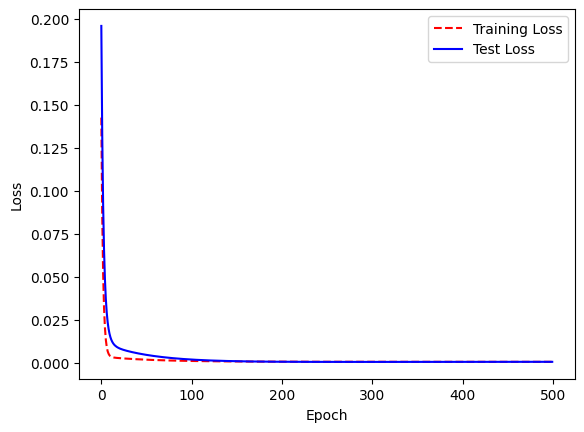

In [17]:
# Plot the loss curve

#change the value from pyTorch tensors to numpy arrays
epoch_count = np.array(epoch_count)
loss_values = np.array(loss_values)
test_loss_values = np.array(test_loss_values)

plt.plot(epoch_count,loss_values,'r--')
plt.plot(epoch_count,test_loss_values,'b-')
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')


#### Saving a model in pyTorch 

There are three main methods for saving and loading models:
 1. `torch.save()` -allows you to save a PyTorch model in Pythons Pickel format
 2. `torch.load()` -allows you to load a saved Pytorch model
 3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictonary

In [18]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.7053])), ('bias', tensor([0.3519]))])

In [20]:
# Saving the model

from pathlib import Path

# 1. Create models directory
# Assuming '/tf-knugs/models' is a directory that's been mounted as a volume in the Docker container
MODEL_PATH = Path('/tf-knugs/models/')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create a model save path
MODEL_NAME = 'pytorch_end_to_end_linear_regression.pt'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#3. Save the model (save the state_dict)
torch.save(model_0.state_dict(),MODEL_SAVE_PATH)

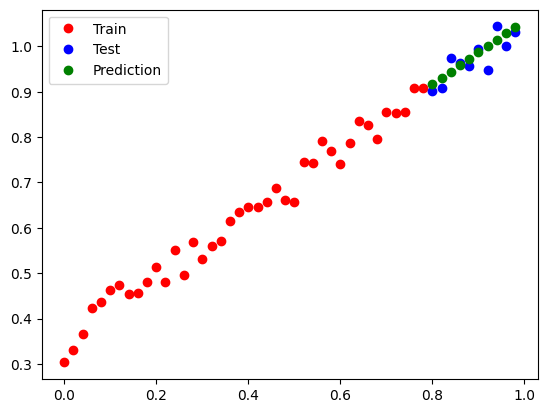

In [21]:
# Loading the module

#1. Create a model instance
model_1 = LinearRegression()

#2. Load the state_dict
model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#3. Set the model to inference mode
model_1.eval()

#4. Make predictions
with torch.inference_mode():
    y_pred = model_1(X_test)

plot_prediction(X_train,y_train,X_test,y_test,X_test,y_pred)